In [1]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as T
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

from mmengine.config import Config

from tools.test import test
from tools.data_poison import data_poison
from modules.vgg import vgg13_bn

In [2]:
%load_ext autoreload
%autoreload 2

可视化毒化后的训练集。

Files already downloaded and verified
Files already downloaded and verified


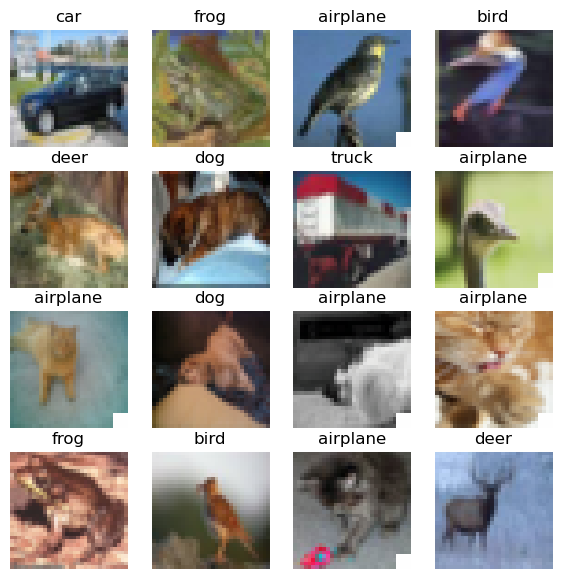

In [3]:
cfg = Config.fromfile('./configs/vgg13_bn_05.py')

classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(7, 7))
for i in range(16):
    img, label = cfg.dset_train[i]
    img = img.numpy().transpose(1, 2, 0)
    img = (img * np.array([0.2023, 0.1994, 0.2010]) + np.array([0.4914, 0.4822, 0.4465])) * 255

    plt.subplot(4, 4, i + 1)
    plt.axis('off')
    plt.title(classes[label])
    plt.imshow(img.astype('uint8'))


加载未受到污染的测试集和污染的数据集。

In [4]:
batch_size = 128

transform_test = T.Compose([
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

clean_dset_test = dset.CIFAR10('./data', train=False, download=True, transform=transform_test)
loader_clean_test = DataLoader(clean_dset_test, batch_size=batch_size, num_workers=2)

poisoned_dset_test = data_poison(clean_dset_test, 1, 0, combine=False)
loader_poisoned_test = DataLoader(poisoned_dset_test, batch_size=batch_size, num_workers=2)

Files already downloaded and verified


可视化毒化后的测试集。

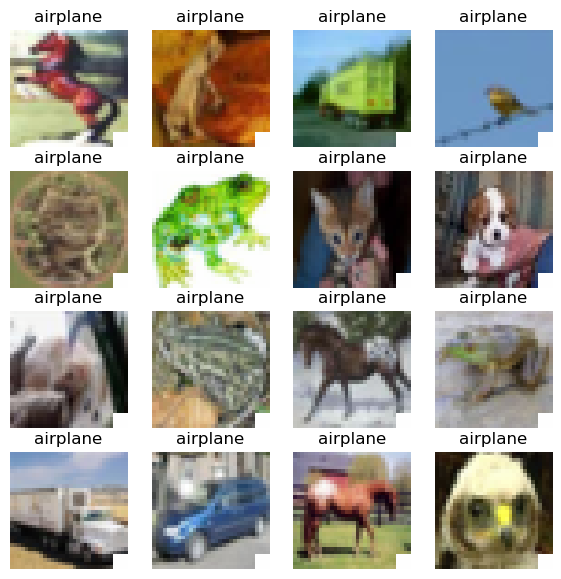

In [5]:
classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(7, 7))
for i in range(16):
    img, label = poisoned_dset_test[i]
    img = img.numpy().transpose(1, 2, 0)
    img = (img * np.array([0.2023, 0.1994, 0.2010]) + np.array([0.4914, 0.4822, 0.4465])) * 255

    plt.subplot(4, 4, i + 1)
    plt.axis('off')
    plt.title(classes[label])
    plt.imshow(img.astype('uint8'))


In [6]:
%%sh
./lab4_helper.sh


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




poison_ratio: 0.0


2023-04-21 22:19:15 - INFO - Set random seed to 1
2023-04-21 22:19:15 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 22:19:19 - INFO - Epoch [1][50/383] loss: 0.8782, lr: 0.00100
2023-04-21 22:19:22 - INFO - Epoch [1][100/383] loss: 0.7239, lr: 0.00100
2023-04-21 22:19:25 - INFO - Epoch [1][150/383] loss: 0.7031, lr: 0.00100
2023-04-21 22:19:27 - INFO - Epoch [1][200/383] loss: 0.6117, lr: 0.00100
2023-04-21 22:19:30 - INFO - Epoch [1][250/383] loss: 0.6556, lr: 0.00100
2023-04-21 22:19:32 - INFO - Epoch [1][300/383] loss: 0.7362, lr: 0.00100
2023-04-21 22:19:35 - INFO - Epoch [1][350/383] loss: 0.4719, lr: 0.00100
2023-04-21 22:19:41 - INFO - Epoch [1][383/383] train_loss: 0.7158, val_loss: 0.6028, lr: 0.00100, train_acc: 83.7510%, val_acc: 82.9000%
2023-04-21 22:19:43 - INFO - Epoch [2][50/383] loss: 0.5450, lr: 0.00001
2023-04-21 22:19:46 - INFO - Epoch [2][100/383] loss: 0.3639, lr: 0.00001
2023-04-21 22:19:48 - INFO - Epoch [2][150/383] loss: 0.4346, lr: 0.00001
2023-04-21 22:19:50 - INFO - Epoch [2][200/383] loss: 0.3220, lr: 0.00001
2023-04-21 22:19:53 - INFO - Epoch [2][250/383] lo

Epoch 00390: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00397: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00404: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00411: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00418: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00425: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00432: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 22:20:04 - INFO - Epoch [2][383/383] train_loss: 0.3234, val_loss: 0.3602, lr: 0.00001, train_acc: 91.6449%, val_acc: 89.6000%
2023-04-21 22:20:06 - INFO - Epoch [3][50/383] loss: 0.5050, lr: 0.00001
2023-04-21 22:20:09 - INFO - Epoch [3][100/383] loss: 0.3206, lr: 0.00001
2023-04-21 22:20:11 - INFO - Epoch [3][150/383] loss: 0.3730, lr: 0.00001
2023-04-21 22:20:13 - INFO - Epoch [3][200/383] loss: 0.2500, lr: 0.00001
2023-04-21 22:20:16 - INFO - Epoch [3][250/383] loss: 0.2980, lr: 0.00001
2023-04-21 22:20:18 - INFO - Epoch [3][300/383] loss: 0.2003, lr: 0.00001
2023-04-21 22:20:20 - INFO - Epoch [3][350/383] loss: 0.0936, lr: 0.00001
2023-04-21 22:20:26 - INFO - Epoch [3][383/383] train_loss: 0.2663, val_loss: 0.3454, lr: 0.00001, train_acc: 92.6327%, val_acc: 89.7000%
2023-04-21 22:20:29 - INFO - Epoch [4][50/383] loss: 0.4626, lr: 0.00001
2023-04-21 22:20:31 - INFO - Epoch [4][100/383] loss: 0.2617, lr: 0.00001
2023-04-21 22:20:34 - INFO - Epoch [4][150/383] loss: 0.3295

poison_ratio: 0.1


2023-04-21 22:27:02 - INFO - Set random seed to 1
2023-04-21 22:27:03 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 22:27:07 - INFO - Epoch [1][50/418] loss: 0.6888, lr: 0.00100
2023-04-21 22:27:09 - INFO - Epoch [1][100/418] loss: 0.8848, lr: 0.00100
2023-04-21 22:27:11 - INFO - Epoch [1][150/418] loss: 0.6085, lr: 0.00100
2023-04-21 22:27:13 - INFO - Epoch [1][200/418] loss: 0.4805, lr: 0.00100
2023-04-21 22:27:16 - INFO - Epoch [1][250/418] loss: 0.5481, lr: 0.00100
2023-04-21 22:27:18 - INFO - Epoch [1][300/418] loss: 0.5934, lr: 0.00100
2023-04-21 22:27:20 - INFO - Epoch [1][350/418] loss: 0.5382, lr: 0.00100
2023-04-21 22:27:23 - INFO - Epoch [1][400/418] loss: 0.5702, lr: 0.00100
2023-04-21 22:27:28 - INFO - Epoch [1][418/418] train_loss: 0.6938, val_loss: 0.5532, lr: 0.00100, train_acc: 86.7178%, val_acc: 81.4000%
2023-04-21 22:27:31 - INFO - Epoch [2][50/418] loss: 0.4700, lr: 0.00001
2023-04-21 22:27:33 - INFO - Epoch [2][100/418] loss: 0.2994, lr: 0.00001
2023-04-21 22:27:35 - INFO - Epoch [2][150/418] loss: 0.2193, lr: 0.00001
2023-04-21 22:27:38 - INFO - Epoch [2][200/418] lo

Epoch 00425: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00432: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00439: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00446: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00453: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00460: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00467: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 22:27:52 - INFO - Epoch [2][418/418] train_loss: 0.3037, val_loss: 0.3593, lr: 0.00001, train_acc: 92.1701%, val_acc: 88.4000%
2023-04-21 22:27:55 - INFO - Epoch [3][50/418] loss: 0.4082, lr: 0.00001
2023-04-21 22:27:57 - INFO - Epoch [3][100/418] loss: 0.2400, lr: 0.00001
2023-04-21 22:27:59 - INFO - Epoch [3][150/418] loss: 0.1878, lr: 0.00001
2023-04-21 22:28:02 - INFO - Epoch [3][200/418] loss: 0.2866, lr: 0.00001
2023-04-21 22:28:04 - INFO - Epoch [3][250/418] loss: 0.1449, lr: 0.00001
2023-04-21 22:28:06 - INFO - Epoch [3][300/418] loss: 0.2638, lr: 0.00001
2023-04-21 22:28:09 - INFO - Epoch [3][350/418] loss: 0.2198, lr: 0.00001
2023-04-21 22:28:11 - INFO - Epoch [3][400/418] loss: 0.1978, lr: 0.00001
2023-04-21 22:28:17 - INFO - Epoch [3][418/418] train_loss: 0.2555, val_loss: 0.3406, lr: 0.00001, train_acc: 92.9850%, val_acc: 89.3000%
2023-04-21 22:28:19 - INFO - Epoch [4][50/418] loss: 0.3465, lr: 0.00001
2023-04-21 22:28:21 - INFO - Epoch [4][100/418] loss: 0.2415

poison_ratio: 0.2


2023-04-21 22:35:18 - INFO - Set random seed to 1
2023-04-21 22:35:18 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 22:35:22 - INFO - Epoch [1][50/454] loss: 0.8848, lr: 0.00100
2023-04-21 22:35:24 - INFO - Epoch [1][100/454] loss: 0.5190, lr: 0.00100
2023-04-21 22:35:26 - INFO - Epoch [1][150/454] loss: 0.5993, lr: 0.00100
2023-04-21 22:35:29 - INFO - Epoch [1][200/454] loss: 0.6386, lr: 0.00100
2023-04-21 22:35:31 - INFO - Epoch [1][250/454] loss: 0.6474, lr: 0.00100
2023-04-21 22:35:33 - INFO - Epoch [1][300/454] loss: 0.4764, lr: 0.00100
2023-04-21 22:35:36 - INFO - Epoch [1][350/454] loss: 0.6516, lr: 0.00100
2023-04-21 22:35:38 - INFO - Epoch [1][400/454] loss: 0.4296, lr: 0.00100
2023-04-21 22:35:40 - INFO - Epoch [1][450/454] loss: 0.4501, lr: 0.00100
2023-04-21 22:35:46 - INFO - Epoch [1][454/454] train_loss: 0.6583, val_loss: 0.5108, lr: 0.00100, train_acc: 87.5328%, val_acc: 83.2000%
2023-04-21 22:35:48 - INFO - Epoch [2][50/454] loss: 0.2989, lr: 0.00001
2023-04-21 22:35:50 - INFO - Epoch [2][100/454] loss: 0.3302, lr: 0.00001
2023-04-21 22:35:53 - INFO - Epoch [2][150/454] lo

Epoch 00461: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00468: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00475: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00482: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00489: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00496: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00503: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 22:36:12 - INFO - Epoch [2][454/454] train_loss: 0.3047, val_loss: 0.3763, lr: 0.00001, train_acc: 92.1638%, val_acc: 88.2000%
2023-04-21 22:36:14 - INFO - Epoch [3][50/454] loss: 0.2686, lr: 0.00001
2023-04-21 22:36:16 - INFO - Epoch [3][100/454] loss: 0.2789, lr: 0.00001
2023-04-21 22:36:19 - INFO - Epoch [3][150/454] loss: 0.3083, lr: 0.00001
2023-04-21 22:36:21 - INFO - Epoch [3][200/454] loss: 0.3182, lr: 0.00001
2023-04-21 22:36:23 - INFO - Epoch [3][250/454] loss: 0.3382, lr: 0.00001
2023-04-21 22:36:26 - INFO - Epoch [3][300/454] loss: 0.2237, lr: 0.00001
2023-04-21 22:36:28 - INFO - Epoch [3][350/454] loss: 0.3661, lr: 0.00001
2023-04-21 22:36:30 - INFO - Epoch [3][400/454] loss: 0.1766, lr: 0.00001
2023-04-21 22:36:32 - INFO - Epoch [3][450/454] loss: 0.1492, lr: 0.00001
2023-04-21 22:36:38 - INFO - Epoch [3][454/454] train_loss: 0.2478, val_loss: 0.3640, lr: 0.00001, train_acc: 93.0672%, val_acc: 88.4000%
2023-04-21 22:36:40 - INFO - Epoch [4][50/454] loss: 0.2215

poison_ratio: 0.3


2023-04-21 22:44:12 - INFO - Set random seed to 1
2023-04-21 22:44:13 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 22:44:16 - INFO - Epoch [1][50/489] loss: 0.8708, lr: 0.00100
2023-04-21 22:44:18 - INFO - Epoch [1][100/489] loss: 0.7132, lr: 0.00100
2023-04-21 22:44:21 - INFO - Epoch [1][150/489] loss: 0.6584, lr: 0.00100
2023-04-21 22:44:23 - INFO - Epoch [1][200/489] loss: 0.7132, lr: 0.00100
2023-04-21 22:44:25 - INFO - Epoch [1][250/489] loss: 0.5143, lr: 0.00100
2023-04-21 22:44:28 - INFO - Epoch [1][300/489] loss: 0.4424, lr: 0.00100
2023-04-21 22:44:30 - INFO - Epoch [1][350/489] loss: 0.6230, lr: 0.00100
2023-04-21 22:44:32 - INFO - Epoch [1][400/489] loss: 0.5217, lr: 0.00100
2023-04-21 22:44:34 - INFO - Epoch [1][450/489] loss: 0.5538, lr: 0.00100
2023-04-21 22:44:42 - INFO - Epoch [1][489/489] train_loss: 0.6291, val_loss: 0.4311, lr: 0.00100, train_acc: 88.9008%, val_acc: 85.2000%
2023-04-21 22:44:44 - INFO - Epoch [2][50/489] loss: 0.3853, lr: 0.00001
2023-04-21 22:44:46 - INFO - Epoch [2][100/489] loss: 0.4099, lr: 0.00001
2023-04-21 22:44:49 - INFO - Epoch [2][150/489] lo

Epoch 00496: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00503: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00510: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00517: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00524: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00531: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00538: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 22:45:11 - INFO - Epoch [2][489/489] train_loss: 0.2749, val_loss: 0.3083, lr: 0.00001, train_acc: 92.8272%, val_acc: 89.3000%
2023-04-21 22:45:13 - INFO - Epoch [3][50/489] loss: 0.3231, lr: 0.00001
2023-04-21 22:45:15 - INFO - Epoch [3][100/489] loss: 0.3498, lr: 0.00001
2023-04-21 22:45:18 - INFO - Epoch [3][150/489] loss: 0.2683, lr: 0.00001
2023-04-21 22:45:20 - INFO - Epoch [3][200/489] loss: 0.2857, lr: 0.00001
2023-04-21 22:45:22 - INFO - Epoch [3][250/489] loss: 0.2480, lr: 0.00001
2023-04-21 22:45:24 - INFO - Epoch [3][300/489] loss: 0.1880, lr: 0.00001
2023-04-21 22:45:27 - INFO - Epoch [3][350/489] loss: 0.2513, lr: 0.00001
2023-04-21 22:45:29 - INFO - Epoch [3][400/489] loss: 0.2002, lr: 0.00001
2023-04-21 22:45:31 - INFO - Epoch [3][450/489] loss: 0.1380, lr: 0.00001
2023-04-21 22:45:39 - INFO - Epoch [3][489/489] train_loss: 0.2318, val_loss: 0.2908, lr: 0.00001, train_acc: 93.5248%, val_acc: 90.2000%
2023-04-21 22:45:41 - INFO - Epoch [4][50/489] loss: 0.3045

poison_ratio: 0.4


2023-04-21 22:53:48 - INFO - Set random seed to 1
2023-04-21 22:53:48 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 22:53:52 - INFO - Epoch [1][50/524] loss: 0.7062, lr: 0.00100
2023-04-21 22:53:54 - INFO - Epoch [1][100/524] loss: 0.6200, lr: 0.00100
2023-04-21 22:53:56 - INFO - Epoch [1][150/524] loss: 0.5065, lr: 0.00100
2023-04-21 22:53:59 - INFO - Epoch [1][200/524] loss: 0.3823, lr: 0.00100
2023-04-21 22:54:01 - INFO - Epoch [1][250/524] loss: 0.5057, lr: 0.00100
2023-04-21 22:54:03 - INFO - Epoch [1][300/524] loss: 0.6190, lr: 0.00100
2023-04-21 22:54:06 - INFO - Epoch [1][350/524] loss: 0.5558, lr: 0.00100
2023-04-21 22:54:08 - INFO - Epoch [1][400/524] loss: 0.4564, lr: 0.00100
2023-04-21 22:54:10 - INFO - Epoch [1][450/524] loss: 0.5803, lr: 0.00100
2023-04-21 22:54:12 - INFO - Epoch [1][500/524] loss: 0.4621, lr: 0.00100
2023-04-21 22:54:19 - INFO - Epoch [1][524/524] train_loss: 0.6165, val_loss: 0.5493, lr: 0.00100, train_acc: 86.2522%, val_acc: 81.5000%
2023-04-21 22:54:22 - INFO - Epoch [2][50/524] loss: 0.3426, lr: 0.00001
2023-04-21 22:54:24 - INFO - Epoch [2][100/524] lo

Epoch 00531: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00538: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00545: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00552: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00559: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00566: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00573: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 22:54:49 - INFO - Epoch [2][524/524] train_loss: 0.2712, val_loss: 0.3402, lr: 0.00001, train_acc: 92.7657%, val_acc: 88.5000%
2023-04-21 22:54:52 - INFO - Epoch [3][50/524] loss: 0.3194, lr: 0.00001
2023-04-21 22:54:54 - INFO - Epoch [3][100/524] loss: 0.2967, lr: 0.00001
2023-04-21 22:54:56 - INFO - Epoch [3][150/524] loss: 0.2637, lr: 0.00001
2023-04-21 22:54:59 - INFO - Epoch [3][200/524] loss: 0.2349, lr: 0.00001
2023-04-21 22:55:01 - INFO - Epoch [3][250/524] loss: 0.1755, lr: 0.00001
2023-04-21 22:55:03 - INFO - Epoch [3][300/524] loss: 0.2230, lr: 0.00001
2023-04-21 22:55:05 - INFO - Epoch [3][350/524] loss: 0.1509, lr: 0.00001
2023-04-21 22:55:08 - INFO - Epoch [3][400/524] loss: 0.1745, lr: 0.00001
2023-04-21 22:55:10 - INFO - Epoch [3][450/524] loss: 0.1694, lr: 0.00001
2023-04-21 22:55:12 - INFO - Epoch [3][500/524] loss: 0.1753, lr: 0.00001
2023-04-21 22:55:19 - INFO - Epoch [3][524/524] train_loss: 0.2301, val_loss: 0.3215, lr: 0.00001, train_acc: 93.5119%, val

poison_ratio: 0.5


2023-04-21 23:04:02 - INFO - Set random seed to 1
2023-04-21 23:04:03 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 23:04:07 - INFO - Epoch [1][50/524] loss: 0.7255, lr: 0.00100
2023-04-21 23:04:09 - INFO - Epoch [1][100/524] loss: 0.6255, lr: 0.00100
2023-04-21 23:04:11 - INFO - Epoch [1][150/524] loss: 0.5690, lr: 0.00100
2023-04-21 23:04:13 - INFO - Epoch [1][200/524] loss: 0.4257, lr: 0.00100
2023-04-21 23:04:16 - INFO - Epoch [1][250/524] loss: 0.4787, lr: 0.00100
2023-04-21 23:04:18 - INFO - Epoch [1][300/524] loss: 0.5975, lr: 0.00100
2023-04-21 23:04:20 - INFO - Epoch [1][350/524] loss: 0.4059, lr: 0.00100
2023-04-21 23:04:22 - INFO - Epoch [1][400/524] loss: 0.5046, lr: 0.00100
2023-04-21 23:04:25 - INFO - Epoch [1][450/524] loss: 0.4951, lr: 0.00100
2023-04-21 23:04:27 - INFO - Epoch [1][500/524] loss: 0.4375, lr: 0.00100
2023-04-21 23:04:34 - INFO - Epoch [1][524/524] train_loss: 0.6143, val_loss: 0.5276, lr: 0.00100, train_acc: 86.1134%, val_acc: 82.3000%
2023-04-21 23:04:37 - INFO - Epoch [2][50/524] loss: 0.3553, lr: 0.00001
2023-04-21 23:04:39 - INFO - Epoch [2][100/524] lo

Epoch 00531: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00538: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00545: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00552: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00559: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00566: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00573: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 23:05:05 - INFO - Epoch [2][524/524] train_loss: 0.2710, val_loss: 0.3353, lr: 0.00001, train_acc: 92.9239%, val_acc: 88.3000%
2023-04-21 23:05:07 - INFO - Epoch [3][50/524] loss: 0.3079, lr: 0.00001
2023-04-21 23:05:09 - INFO - Epoch [3][100/524] loss: 0.2340, lr: 0.00001
2023-04-21 23:05:12 - INFO - Epoch [3][150/524] loss: 0.2917, lr: 0.00001
2023-04-21 23:05:15 - INFO - Epoch [3][200/524] loss: 0.2110, lr: 0.00001
2023-04-21 23:05:17 - INFO - Epoch [3][250/524] loss: 0.2070, lr: 0.00001
2023-04-21 23:05:19 - INFO - Epoch [3][300/524] loss: 0.3024, lr: 0.00001
2023-04-21 23:05:22 - INFO - Epoch [3][350/524] loss: 0.1186, lr: 0.00001
2023-04-21 23:05:24 - INFO - Epoch [3][400/524] loss: 0.2167, lr: 0.00001
2023-04-21 23:05:27 - INFO - Epoch [3][450/524] loss: 0.2109, lr: 0.00001
2023-04-21 23:05:29 - INFO - Epoch [3][500/524] loss: 0.1807, lr: 0.00001
2023-04-21 23:05:36 - INFO - Epoch [3][524/524] train_loss: 0.2297, val_loss: 0.3204, lr: 0.00001, train_acc: 93.5716%, val

poison_ratio: 0.6


2023-04-21 23:14:21 - INFO - Set random seed to 1
2023-04-21 23:14:22 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 23:14:25 - INFO - Epoch [1][50/559] loss: 0.7624, lr: 0.00100
2023-04-21 23:14:28 - INFO - Epoch [1][100/559] loss: 0.7358, lr: 0.00100
2023-04-21 23:14:30 - INFO - Epoch [1][150/559] loss: 0.6996, lr: 0.00100
2023-04-21 23:14:32 - INFO - Epoch [1][200/559] loss: 0.5890, lr: 0.00100
2023-04-21 23:14:35 - INFO - Epoch [1][250/559] loss: 0.4751, lr: 0.00100
2023-04-21 23:14:37 - INFO - Epoch [1][300/559] loss: 0.4200, lr: 0.00100
2023-04-21 23:14:39 - INFO - Epoch [1][350/559] loss: 0.5130, lr: 0.00100
2023-04-21 23:14:41 - INFO - Epoch [1][400/559] loss: 0.4190, lr: 0.00100
2023-04-21 23:14:44 - INFO - Epoch [1][450/559] loss: 0.4743, lr: 0.00100
2023-04-21 23:14:46 - INFO - Epoch [1][500/559] loss: 0.5571, lr: 0.00100
2023-04-21 23:14:48 - INFO - Epoch [1][550/559] loss: 0.4042, lr: 0.00100
2023-04-21 23:14:55 - INFO - Epoch [1][559/559] train_loss: 0.5831, val_loss: 0.4921, lr: 0.00100, train_acc: 86.9706%, val_acc: 84.3000%
2023-04-21 23:14:57 - INFO - Epoch [2][50/559] lo

Epoch 00566: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00573: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00580: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00587: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00594: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00601: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00608: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 23:15:27 - INFO - Epoch [2][559/559] train_loss: 0.2696, val_loss: 0.2927, lr: 0.00001, train_acc: 92.9427%, val_acc: 90.1000%
2023-04-21 23:15:30 - INFO - Epoch [3][50/559] loss: 0.2539, lr: 0.00001
2023-04-21 23:15:32 - INFO - Epoch [3][100/559] loss: 0.2624, lr: 0.00001
2023-04-21 23:15:34 - INFO - Epoch [3][150/559] loss: 0.2072, lr: 0.00001
2023-04-21 23:15:36 - INFO - Epoch [3][200/559] loss: 0.1943, lr: 0.00001
2023-04-21 23:15:39 - INFO - Epoch [3][250/559] loss: 0.2162, lr: 0.00001
2023-04-21 23:15:41 - INFO - Epoch [3][300/559] loss: 0.1960, lr: 0.00001
2023-04-21 23:15:43 - INFO - Epoch [3][350/559] loss: 0.2515, lr: 0.00001
2023-04-21 23:15:46 - INFO - Epoch [3][400/559] loss: 0.2080, lr: 0.00001
2023-04-21 23:15:48 - INFO - Epoch [3][450/559] loss: 0.2423, lr: 0.00001
2023-04-21 23:15:50 - INFO - Epoch [3][500/559] loss: 0.2094, lr: 0.00001
2023-04-21 23:15:52 - INFO - Epoch [3][550/559] loss: 0.1060, lr: 0.00001
2023-04-21 23:15:59 - INFO - Epoch [3][559/559] t

poison_ratio: 0.7


2023-04-21 23:25:18 - INFO - Set random seed to 1
2023-04-21 23:25:18 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 23:25:22 - INFO - Epoch [1][50/594] loss: 0.8033, lr: 0.00100
2023-04-21 23:25:24 - INFO - Epoch [1][100/594] loss: 0.6827, lr: 0.00100
2023-04-21 23:25:26 - INFO - Epoch [1][150/594] loss: 0.4611, lr: 0.00100
2023-04-21 23:25:29 - INFO - Epoch [1][200/594] loss: 0.4228, lr: 0.00100
2023-04-21 23:25:31 - INFO - Epoch [1][250/594] loss: 0.4162, lr: 0.00100
2023-04-21 23:25:33 - INFO - Epoch [1][300/594] loss: 0.6109, lr: 0.00100
2023-04-21 23:25:36 - INFO - Epoch [1][350/594] loss: 0.3072, lr: 0.00100
2023-04-21 23:25:38 - INFO - Epoch [1][400/594] loss: 0.3554, lr: 0.00100
2023-04-21 23:25:40 - INFO - Epoch [1][450/594] loss: 0.3981, lr: 0.00100
2023-04-21 23:25:42 - INFO - Epoch [1][500/594] loss: 0.6455, lr: 0.00100
2023-04-21 23:25:45 - INFO - Epoch [1][550/594] loss: 0.4163, lr: 0.00100
2023-04-21 23:25:54 - INFO - Epoch [1][594/594] train_loss: 0.5598, val_loss: 0.5363, lr: 0.00100, train_acc: 87.3803%, val_acc: 82.3000%
2023-04-21 23:25:56 - INFO - Epoch [2][50/594] lo

Epoch 00601: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00608: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00615: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00622: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00629: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00636: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00643: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 23:26:28 - INFO - Epoch [2][594/594] train_loss: 0.2589, val_loss: 0.3123, lr: 0.00001, train_acc: 93.1355%, val_acc: 89.4000%
2023-04-21 23:26:30 - INFO - Epoch [3][50/594] loss: 0.3210, lr: 0.00001
2023-04-21 23:26:32 - INFO - Epoch [3][100/594] loss: 0.3402, lr: 0.00001
2023-04-21 23:26:35 - INFO - Epoch [3][150/594] loss: 0.1818, lr: 0.00001
2023-04-21 23:26:37 - INFO - Epoch [3][200/594] loss: 0.1914, lr: 0.00001
2023-04-21 23:26:39 - INFO - Epoch [3][250/594] loss: 0.2565, lr: 0.00001
2023-04-21 23:26:41 - INFO - Epoch [3][300/594] loss: 0.3399, lr: 0.00001
2023-04-21 23:26:44 - INFO - Epoch [3][350/594] loss: 0.0804, lr: 0.00001
2023-04-21 23:26:46 - INFO - Epoch [3][400/594] loss: 0.2118, lr: 0.00001
2023-04-21 23:26:48 - INFO - Epoch [3][450/594] loss: 0.2631, lr: 0.00001
2023-04-21 23:26:50 - INFO - Epoch [3][500/594] loss: 0.2698, lr: 0.00001
2023-04-21 23:26:53 - INFO - Epoch [3][550/594] loss: 0.1207, lr: 0.00001
2023-04-21 23:27:01 - INFO - Epoch [3][594/594] t

poison_ratio: 0.8


2023-04-21 23:36:55 - INFO - Set random seed to 1
2023-04-21 23:36:55 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 23:36:59 - INFO - Epoch [1][50/629] loss: 0.8537, lr: 0.00100
2023-04-21 23:37:01 - INFO - Epoch [1][100/629] loss: 0.6597, lr: 0.00100
2023-04-21 23:37:03 - INFO - Epoch [1][150/629] loss: 0.5565, lr: 0.00100
2023-04-21 23:37:06 - INFO - Epoch [1][200/629] loss: 0.4950, lr: 0.00100
2023-04-21 23:37:08 - INFO - Epoch [1][250/629] loss: 0.4148, lr: 0.00100
2023-04-21 23:37:10 - INFO - Epoch [1][300/629] loss: 0.3182, lr: 0.00100
2023-04-21 23:37:13 - INFO - Epoch [1][350/629] loss: 0.5089, lr: 0.00100
2023-04-21 23:37:15 - INFO - Epoch [1][400/629] loss: 0.3756, lr: 0.00100
2023-04-21 23:37:17 - INFO - Epoch [1][450/629] loss: 0.3793, lr: 0.00100
2023-04-21 23:37:19 - INFO - Epoch [1][500/629] loss: 0.2854, lr: 0.00100
2023-04-21 23:37:22 - INFO - Epoch [1][550/629] loss: 0.4572, lr: 0.00100
2023-04-21 23:37:24 - INFO - Epoch [1][600/629] loss: 0.4667, lr: 0.00100
2023-04-21 23:37:32 - INFO - Epoch [1][629/629] train_loss: 0.5350, val_loss: 0.4095, lr: 0.00100, train_acc: 88.

Epoch 00636: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00643: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00650: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00657: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00664: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00671: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00678: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 23:38:09 - INFO - Epoch [2][629/629] train_loss: 0.2505, val_loss: 0.2730, lr: 0.00001, train_acc: 93.3230%, val_acc: 90.9000%
2023-04-21 23:38:11 - INFO - Epoch [3][50/629] loss: 0.3420, lr: 0.00001
2023-04-21 23:38:13 - INFO - Epoch [3][100/629] loss: 0.3863, lr: 0.00001
2023-04-21 23:38:15 - INFO - Epoch [3][150/629] loss: 0.2702, lr: 0.00001
2023-04-21 23:38:18 - INFO - Epoch [3][200/629] loss: 0.2412, lr: 0.00001
2023-04-21 23:38:20 - INFO - Epoch [3][250/629] loss: 0.1872, lr: 0.00001
2023-04-21 23:38:22 - INFO - Epoch [3][300/629] loss: 0.1588, lr: 0.00001
2023-04-21 23:38:25 - INFO - Epoch [3][350/629] loss: 0.2557, lr: 0.00001
2023-04-21 23:38:27 - INFO - Epoch [3][400/629] loss: 0.3042, lr: 0.00001
2023-04-21 23:38:29 - INFO - Epoch [3][450/629] loss: 0.1896, lr: 0.00001
2023-04-21 23:38:32 - INFO - Epoch [3][500/629] loss: 0.1559, lr: 0.00001
2023-04-21 23:38:34 - INFO - Epoch [3][550/629] loss: 0.1890, lr: 0.00001
2023-04-21 23:38:36 - INFO - Epoch [3][600/629] l

poison_ratio: 0.9


2023-04-21 23:49:17 - INFO - Set random seed to 1
2023-04-21 23:49:18 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-21 23:49:22 - INFO - Epoch [1][50/665] loss: 0.9006, lr: 0.00100
2023-04-21 23:49:24 - INFO - Epoch [1][100/665] loss: 0.6833, lr: 0.00100
2023-04-21 23:49:26 - INFO - Epoch [1][150/665] loss: 0.5277, lr: 0.00100
2023-04-21 23:49:28 - INFO - Epoch [1][200/665] loss: 0.5090, lr: 0.00100
2023-04-21 23:49:31 - INFO - Epoch [1][250/665] loss: 0.5405, lr: 0.00100
2023-04-21 23:49:33 - INFO - Epoch [1][300/665] loss: 0.5663, lr: 0.00100
2023-04-21 23:49:35 - INFO - Epoch [1][350/665] loss: 0.5965, lr: 0.00100
2023-04-21 23:49:37 - INFO - Epoch [1][400/665] loss: 0.4087, lr: 0.00100
2023-04-21 23:49:40 - INFO - Epoch [1][450/665] loss: 0.3876, lr: 0.00100
2023-04-21 23:49:42 - INFO - Epoch [1][500/665] loss: 0.3686, lr: 0.00100
2023-04-21 23:49:44 - INFO - Epoch [1][550/665] loss: 0.5171, lr: 0.00100
2023-04-21 23:49:47 - INFO - Epoch [1][600/665] loss: 0.3423, lr: 0.00100
2023-04-21 23:49:49 - INFO - Epoch [1][650/665] loss: 0.3849, lr: 0.00100
2023-04-21 23:49:57 - INFO - Epoch [1][

Epoch 00672: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00679: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00686: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00693: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00700: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00707: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00714: reducing learning rate of group 0 to 1.0000e-05.


2023-04-21 23:50:35 - INFO - Epoch [2][665/665] train_loss: 0.2508, val_loss: 0.2943, lr: 0.00001, train_acc: 93.2976%, val_acc: 89.9000%
2023-04-21 23:50:38 - INFO - Epoch [3][50/665] loss: 0.4348, lr: 0.00001
2023-04-21 23:50:40 - INFO - Epoch [3][100/665] loss: 0.3316, lr: 0.00001
2023-04-21 23:50:42 - INFO - Epoch [3][150/665] loss: 0.3331, lr: 0.00001
2023-04-21 23:50:45 - INFO - Epoch [3][200/665] loss: 0.2241, lr: 0.00001
2023-04-21 23:50:47 - INFO - Epoch [3][250/665] loss: 0.2295, lr: 0.00001
2023-04-21 23:50:49 - INFO - Epoch [3][300/665] loss: 0.4011, lr: 0.00001
2023-04-21 23:50:51 - INFO - Epoch [3][350/665] loss: 0.2911, lr: 0.00001
2023-04-21 23:50:54 - INFO - Epoch [3][400/665] loss: 0.1692, lr: 0.00001
2023-04-21 23:50:56 - INFO - Epoch [3][450/665] loss: 0.2019, lr: 0.00001
2023-04-21 23:50:58 - INFO - Epoch [3][500/665] loss: 0.1868, lr: 0.00001
2023-04-21 23:51:01 - INFO - Epoch [3][550/665] loss: 0.1451, lr: 0.00001
2023-04-21 23:51:03 - INFO - Epoch [3][600/665] l

poison_ratio: 0.0


2023-04-22 00:02:16 - INFO - Set random seed to 1
2023-04-22 00:02:16 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-22 00:02:20 - INFO - Epoch [1][50/700] loss: 0.8322, lr: 0.00100
2023-04-22 00:02:22 - INFO - Epoch [1][100/700] loss: 0.5049, lr: 0.00100
2023-04-22 00:02:24 - INFO - Epoch [1][150/700] loss: 0.5993, lr: 0.00100
2023-04-22 00:02:27 - INFO - Epoch [1][200/700] loss: 0.4183, lr: 0.00100
2023-04-22 00:02:29 - INFO - Epoch [1][250/700] loss: 0.7116, lr: 0.00100
2023-04-22 00:02:31 - INFO - Epoch [1][300/700] loss: 0.6496, lr: 0.00100
2023-04-22 00:02:33 - INFO - Epoch [1][350/700] loss: 0.5319, lr: 0.00100
2023-04-22 00:02:36 - INFO - Epoch [1][400/700] loss: 0.4633, lr: 0.00100
2023-04-22 00:02:38 - INFO - Epoch [1][450/700] loss: 0.3159, lr: 0.00100
2023-04-22 00:02:40 - INFO - Epoch [1][500/700] loss: 0.5371, lr: 0.00100
2023-04-22 00:02:43 - INFO - Epoch [1][550/700] loss: 0.3915, lr: 0.00100
2023-04-22 00:02:45 - INFO - Epoch [1][600/700] loss: 0.4078, lr: 0.00100
2023-04-22 00:02:47 - INFO - Epoch [1][650/700] loss: 0.2804, lr: 0.00100
2023-04-22 00:02:49 - INFO - Epoch [1][

Epoch 00707: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00714: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00721: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00728: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00735: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00742: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00749: reducing learning rate of group 0 to 1.0000e-05.


2023-04-22 00:03:37 - INFO - Epoch [2][700/700] train_loss: 0.2440, val_loss: 0.2353, lr: 0.00001, train_acc: 93.2715%, val_acc: 92.9000%
2023-04-22 00:03:39 - INFO - Epoch [3][50/700] loss: 0.4403, lr: 0.00001
2023-04-22 00:03:42 - INFO - Epoch [3][100/700] loss: 0.2061, lr: 0.00001
2023-04-22 00:03:44 - INFO - Epoch [3][150/700] loss: 0.2620, lr: 0.00001
2023-04-22 00:03:47 - INFO - Epoch [3][200/700] loss: 0.2237, lr: 0.00001
2023-04-22 00:03:49 - INFO - Epoch [3][250/700] loss: 0.4204, lr: 0.00001
2023-04-22 00:03:51 - INFO - Epoch [3][300/700] loss: 0.2725, lr: 0.00001
2023-04-22 00:03:53 - INFO - Epoch [3][350/700] loss: 0.1668, lr: 0.00001
2023-04-22 00:03:56 - INFO - Epoch [3][400/700] loss: 0.3024, lr: 0.00001
2023-04-22 00:03:58 - INFO - Epoch [3][450/700] loss: 0.1518, lr: 0.00001
2023-04-22 00:04:00 - INFO - Epoch [3][500/700] loss: 0.3034, lr: 0.00001
2023-04-22 00:04:03 - INFO - Epoch [3][550/700] loss: 0.1102, lr: 0.00001
2023-04-22 00:04:05 - INFO - Epoch [3][600/700] l

poison_ratio: 1.0


2023-04-22 00:15:59 - INFO - Set random seed to 1
2023-04-22 00:16:00 - INFO - Start running, max: 20 epochs


Files already downloaded and verified
Files already downloaded and verified


2023-04-22 00:16:03 - INFO - Epoch [1][50/735] loss: 0.8242, lr: 0.00100
2023-04-22 00:16:06 - INFO - Epoch [1][100/735] loss: 0.7707, lr: 0.00100
2023-04-22 00:16:08 - INFO - Epoch [1][150/735] loss: 0.6486, lr: 0.00100
2023-04-22 00:16:10 - INFO - Epoch [1][200/735] loss: 0.4600, lr: 0.00100
2023-04-22 00:16:13 - INFO - Epoch [1][250/735] loss: 0.5178, lr: 0.00100
2023-04-22 00:16:15 - INFO - Epoch [1][300/735] loss: 0.3728, lr: 0.00100
2023-04-22 00:16:17 - INFO - Epoch [1][350/735] loss: 0.3617, lr: 0.00100
2023-04-22 00:16:19 - INFO - Epoch [1][400/735] loss: 0.5689, lr: 0.00100
2023-04-22 00:16:22 - INFO - Epoch [1][450/735] loss: 0.3596, lr: 0.00100
2023-04-22 00:16:24 - INFO - Epoch [1][500/735] loss: 0.4599, lr: 0.00100
2023-04-22 00:16:26 - INFO - Epoch [1][550/735] loss: 0.3959, lr: 0.00100
2023-04-22 00:16:29 - INFO - Epoch [1][600/735] loss: 0.3794, lr: 0.00100
2023-04-22 00:16:31 - INFO - Epoch [1][650/735] loss: 0.3801, lr: 0.00100
2023-04-22 00:16:33 - INFO - Epoch [1][

Epoch 00742: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00749: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00756: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00763: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00770: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00777: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00784: reducing learning rate of group 0 to 1.0000e-05.


2023-04-22 00:17:25 - INFO - Epoch [2][735/735] train_loss: 0.2442, val_loss: 0.2577, lr: 0.00001, train_acc: 93.2862%, val_acc: 91.0000%
2023-04-22 00:17:27 - INFO - Epoch [3][50/735] loss: 0.2911, lr: 0.00001
2023-04-22 00:17:30 - INFO - Epoch [3][100/735] loss: 0.2920, lr: 0.00001
2023-04-22 00:17:32 - INFO - Epoch [3][150/735] loss: 0.3062, lr: 0.00001
2023-04-22 00:17:34 - INFO - Epoch [3][200/735] loss: 0.2152, lr: 0.00001
2023-04-22 00:17:37 - INFO - Epoch [3][250/735] loss: 0.1391, lr: 0.00001
2023-04-22 00:17:39 - INFO - Epoch [3][300/735] loss: 0.1144, lr: 0.00001
2023-04-22 00:17:41 - INFO - Epoch [3][350/735] loss: 0.1501, lr: 0.00001
2023-04-22 00:17:43 - INFO - Epoch [3][400/735] loss: 0.2793, lr: 0.00001
2023-04-22 00:17:46 - INFO - Epoch [3][450/735] loss: 0.2165, lr: 0.00001
2023-04-22 00:17:48 - INFO - Epoch [3][500/735] loss: 0.2412, lr: 0.00001
2023-04-22 00:17:50 - INFO - Epoch [3][550/735] loss: 0.2096, lr: 0.00001
2023-04-22 00:17:52 - INFO - Epoch [3][600/735] l

In [7]:
ratio = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
CDA = list()
ASR = list()
vgg13_bn_ = vgg13_bn(num_classes=10)
for r in ratio:
    # load pretrained weights
    name = str(r).replace('.', '')
    pth_file = './models/' + name + '.pth'
    vgg13_bn_.load_state_dict(torch.load(pth_file))

    # test
    cda = test(loader_clean_test, vgg13_bn_, verbose=False, cls_acc=False)
    asr = test(loader_poisoned_test, vgg13_bn_, verbose=False, cls_acc=False)

    CDA.append(cda)
    ASR.append(asr)
    print('ratio:%.1f  cda:%.2f%%  asr:%.2f%%' % (r, 100 * cda, 100 * asr))


ratio:0.0  cda:89.14%  asr:1.50%
ratio:0.1  cda:88.89%  asr:97.84%
ratio:0.2  cda:89.14%  asr:98.18%
ratio:0.3  cda:89.27%  asr:98.64%
ratio:0.4  cda:88.72%  asr:98.84%
ratio:0.5  cda:88.78%  asr:98.68%
ratio:0.6  cda:88.64%  asr:99.00%
ratio:0.7  cda:88.22%  asr:99.19%
ratio:0.8  cda:88.18%  asr:99.13%
ratio:0.9  cda:87.88%  asr:99.31%
ratio:1.0  cda:87.32%  asr:99.57%


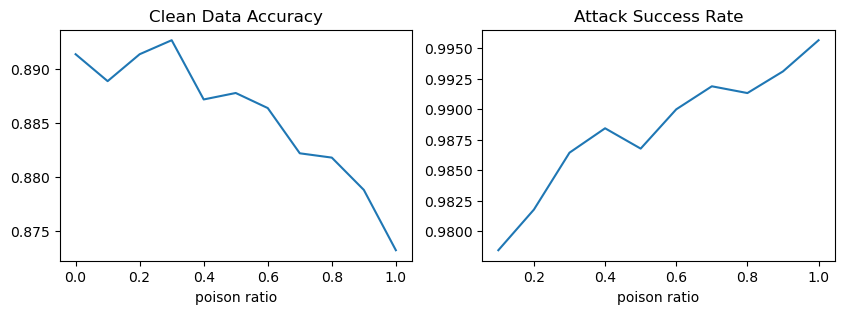

In [8]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('Clean Data Accuracy')
plt.xlabel('poison ratio')
plt.plot(ratio, CDA, '-')

plt.subplot(1, 2, 2)
plt.title('Attack Success Rate')
plt.xlabel('poison ratio')
plt.plot(ratio[1:], ASR[1:], '-')

plt.show()